### **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import nltk
import re
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sentence_transformers.cross_encoder import CrossEncoder
from sentence_transformers import SentenceTransformer, util

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_transformers import XLNetModel, XLNetTokenizer, XLNetForSequenceClassification
from pytorch_transformers import AdamW


**Importing Dataset**

In [4]:
# from google.colab import drive
# drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [ ]:
data = pd.read_csv('/content/Mydrive/MyDrive/WELFake_Dataset.csv')

In [ ]:
data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
#Looking into columns of data
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

**Cleaning of text data**

In [ ]:
#Look for any NaN values
np.NaN in data

False

In [ ]:
#Dropping NaN rows
data = data.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
data = data.dropna().reset_index()

In [ ]:
data = data.drop_duplicates(keep='last')

In [ ]:
data["label"].value_counts()

1    36509
0    35028
Name: label, dtype: int64

In [ ]:
data = data.drop(columns=['index'],axis=1)

In [ ]:
# Copying data for safe purpose
data1 = data.copy()

In [ ]:
# Adding another column to the existing dataframe to add cleaned data
data['Cleaned_text'] = np.nan

In [ ]:
def clean_text(x):
    x= re.sub("[^a-zA-Z0-9 ]+"," ",x)
    x= re.sub("#[_]*[a-z]+@!?"," ",x)
    x = re.sub(r"@\S+", " ",x)
    x = re.sub(r"\n", " ",x)
    x= x.lower()
    return x

In [ ]:
# Cleaning the data
for i in range(0,len(data)):
    try:
        data['text'][i] = contractions.fix(data['text'][i])
        data['Cleaned_text'][i] = clean_text(data['text'][i])
        data['Cleaned_text'][i]= remove_stopwords(data['Cleaned_text'][i])
    except:
        continue

<ipython-input-18-404b19aa5e51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = contractions.fix(data['text'][i])
<ipython-input-18-404b19aa5e51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned_text'][i] = clean_text(data['text'][i])


In [ ]:
data = data.dropna().reset_index()

In [ ]:
data = data.drop(columns=['index'],axis=1)

In [ ]:
# This code is for storage purpose
# data.to_csv('Cleaned dataset-ML.csv')
# data = pd.read_csv('/content/Mydrive/MyDrive/Cleaned dataset-ML.csv')

## **Models**

**HuggingFace Model**

HuggingFace is an open source platform to use pre-trained models. We selected a pre-trained model which was trained on a similar dataset but has the same objective to classify text as fake or not. We used this pre-trained model to check the classification of data. If the results are not satisfactory, we can try to fine tune the model based on our dataset as required.

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-classification", model="hamzab/roberta-fake-news-classification")

config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

**The commented code is run for generating the dataset**

In [ ]:
# data.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'Cleaned_text'], dtype='object')

In [ ]:
# data_copy = data.copy()

In [ ]:
# data_copy = data_copy.drop(columns='label',axis=1)

In [ ]:
# data_copy['Predicted labels'] = np.nan
# data_copy['Predicted scores'] = np.nan

In [ ]:
# data = pd.read_csv('/content/Mydrive/MyDrive/Cleaned dataset-ML.csv')

In [ ]:
# for i in range(0,len(data_copy)):
#     try:
#             sentiment = pipe(data_copy['Cleaned_text'][i],truncation=True)
#             data_copy['Predicted labels'][i] = sentiment[0]['label']
#             data_copy['Predicted scores'][i] = sentiment[0]['score']
#             if i%1000==0:
#               data_copy.to_csv('Set.csv')
#     except:
#         pass

In [ ]:
# dataset = pd.read_csv('/content/Mydrive/MyDrive/Dataset-HuggingFace.csv')

In [ ]:
# main = pd.read_csv('/content/Mydrive/MyDrive/WELFake_Dataset.csv')

In [ ]:
# dataset['label'] = main['label']

<ipython-input-24-4e1f826c6892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['label'] = main['label']


In [ ]:
# dataset = dataset.dropna(axis=0)

In [ ]:
# dataset.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'title', 'text', 'label', 'Cleaned_text',
       'Predicted labels', 'Predicted scores'],
      dtype='object')

**Metrics of HuggingFace model**

The predictions we have obtained are stored in a dataset which is then loaded and used again.

In [5]:
dataset = pd.read_csv('/content/Mydrive/MyDrive/Dataset-HuggingFace.csv')

In [6]:
#Original Dataset
main = pd.read_csv('/content/Mydrive/MyDrive/WELFake_Dataset.csv')

In [7]:
dataset = dataset.dropna(axis=0)

In [9]:
le = LabelEncoder()

In [10]:
le.fit(dataset['Predicted labels'])

LabelEncoder()

In [11]:
list(le.classes_)

['FAKE', 'TRUE']

In [12]:
predictions_HF = le.transform(dataset['Predicted labels'])

In [97]:
data_labels = []
for i in range(0,len(dataset)):
    try:
        data_labels.append(main.loc[main['title'] == dataset['text'].iloc[i]]['label'].tolist()[0])
    except:
        data_labels.append(main.loc[i]['label'])

In [105]:
accuracy_HF = accuracy_score(data_labels,predictions_HF)
accuracy_HF

0.32513718024604454

In [107]:
precision_HF = precision_score(data_labels,predictions_HF)
precision_HF

0.3306155828707375

In [108]:
recall_HF = recall_score(data_labels,predictions_HF)
recall_HF

0.467859021567596

In [109]:
f1score_HF = f1_score(data_labels,predictions_HF)
f1score_HF

0.38744246155633316

In [110]:
conf_HF = confusion_matrix(data_labels,predictions_HF)
conf_HF

array([[ 6983, 27011],
       [15174, 13341]])

[Text(0.5, 1.0, 'Confusion matrix for HuggingFace model')]

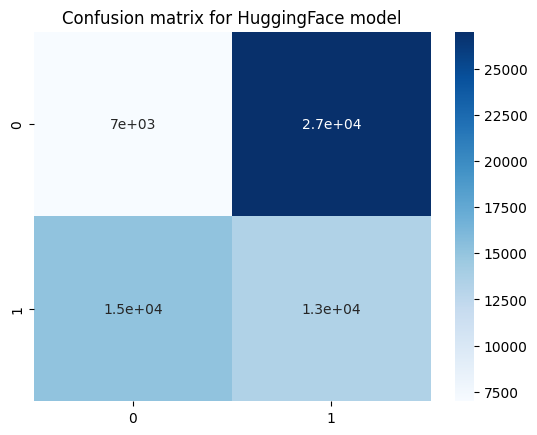

In [111]:
sns.heatmap(conf_HF, annot=True,cmap='Blues').set(title='Confusion matrix for HuggingFace model')

When testing with pre-trained model, we werent able to acheive a good accuracy of the model. But we can fine tune the model and improve the accuracy.

**XLNet**

XLNet was created to address what the authors saw as the shortcomings of the autoencoding method of pretraining used by BERT and other popular language models. This pretraining method resulted in models is said to outperforme BERT on a range of NLP tasks. This model is implemented with the help of huggingface pytorch implementatio because it strikes a nice balance between the high-level APIs.The XLNet models are encoded properly with proper special tokens and trained. We load the XLNetForSequenceClassification. This is the normal XLNet model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained XLNet model and the additional untrained classification layer is trained on our specific task.

In [4]:
data_cleaned = pd.read_csv('/content/Mydrive/MyDrive/Cleaned dataset-ML.csv')

In [5]:
data_cleaned.dropna(subset=['Cleaned_text'], inplace=True)

In [94]:
x = data_cleaned['Cleaned_text']
y = data_cleaned['label']

In [95]:
# Splitting the dataset using SkLearn function
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=48,test_size=0.2, shuffle=True)

In [96]:
sentences = [sentence + " [SEP] [CLS]" for sentence in X_train]
labels = y_train.values

In [97]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

100%|██████████| 798011/798011 [00:00<00:00, 2602722.18B/s]


Tokenize the first sentence:
['▁national', '▁day', '▁prayer', '▁don', 'ald', '▁trump', '▁lashed', '▁south', '▁', 'kor', 'ea', '▁north', '▁', 'kor', 'ea', '▁administration', '▁wants', '▁congress', '▁attach', '▁aid', '▁victims', '▁hurricane', '▁', 'har', 'vey', '▁increase', '▁federal', '▁debt', '▁limit', '▁trump', '▁war', '▁influential', '▁group', '▁house', '▁conservatives', '▁warned', '▁go', 'p', '▁leaders', '▁connect', '▁funding', '▁initiatives', '▁cause', '▁looming', '▁conservative', '▁uprising', '▁usually', '▁republican', 's', '▁want', '▁debt', '▁limit', '▁increase', '▁tied', '▁spending', '▁cuts', '▁entire', '▁city', '▁underwater', '▁thousands', '▁shelters', '▁45', '▁dead', '▁conservatives', '▁battle', '▁sun', 'day', '▁treasury', '▁secretary', '▁', 'st', 'even', '▁', 'm', 'nu', 'chin', '▁said', '▁reality', '▁star', '▁believe', '▁raising', '▁', 's', '▁debt', '▁limit', '▁congress', '▁weeks', '▁order', '▁avoid', '▁default', 'ing', '▁bills', '▁tied', '▁disaster', '▁relief', '▁funding', '

In [98]:
MAX_LEN = 128

In [99]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [100]:
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [101]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [102]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [103]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [104]:
# Select a batch size for training. For fine-tuning with XLNet, the authors recommend a batch size of 32, 48, or 128. We will use 32 here to avoid memory issues.
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [105]:
# Load XLNEtForSequenceClassification, the pretrained XLNet model with a single linear classification layer on top.

from transformers import XLNetForSequenceClassification

model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2)
model.cuda()

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [106]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [107]:
optimizer = AdamW(optimizer_grouped_parameters,
                     lr=2e-5)

In [108]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [109]:
from tqdm import tqdm, trange
import io
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


This is our training loop. At each pass we need to:

Tell the model to compute gradients by setting the model in train mode   
Unpack our data inputs and labels   
Load data onto the GPU for acceleration
Clear out the gradients calculated in the previous pass    
Forward pass (feed input data through the network)    
Backward pass (backpropagation)   
Tell the network to update parameters with optimizer.step()     
Track variables for monitoring progress

Evalution loop:

Tell the model not to compute gradients by setting th emodel in evaluation mode   
Unpack our data inputs and labels      
Load data onto the GPU for acceleration   
Forward pass (feed input data through the network)    
Compute loss on our validation data and track variables for monitoring progress

The model is run through 3 epochs

In [110]:
# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):


  # Training

  # Set our model to training mode (as opposed to evaluation mode)
    model.train()

  # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

  # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        train_loss_set.append(loss.item())
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()


        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))


  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

  # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
            output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            logits = output[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1



Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.21913869334755212



Epoch:  33%|███▎      | 1/3 [20:33<41:06, 1233.43s/it]

Train loss: 0.10138271188605524



Epoch:  67%|██████▋   | 2/3 [41:06<20:32, 1232.98s/it]

Train loss: 0.06350459640229515


Epoch: 100%|██████████| 3/3 [1:01:39<00:00, 1233.01s/it]


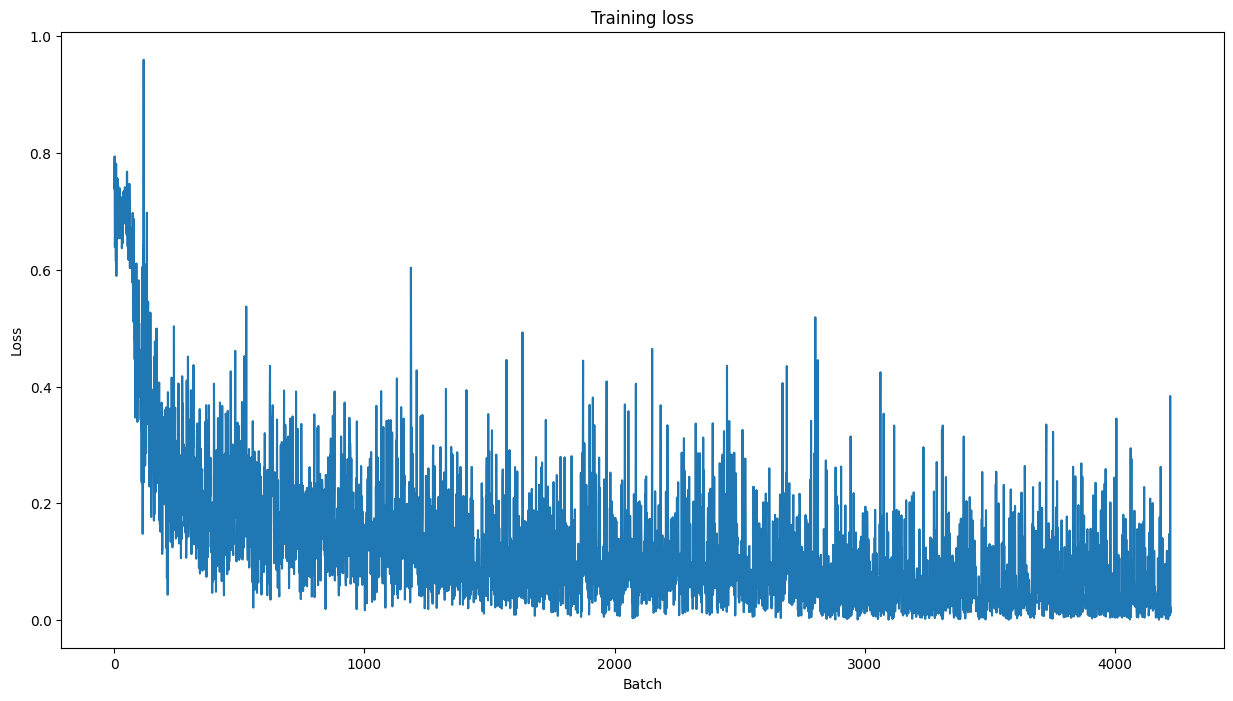

In [111]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

**Testing the model on Test data**

In [112]:
sentences_test = X_test.values

In [113]:
sentences = [sentence + " [SEP] [CLS]" for sentence in sentences_test]
labels = y_test.values

In [114]:
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

In [115]:
MAX_LEN = 128

In [116]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [117]:
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [118]:
attention_masks = []

In [119]:
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

In [120]:
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

In [121]:
batch_size = 32
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [122]:
# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up prediction
    with torch.no_grad():
    # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

In [123]:
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_set = []

for i in range(len(true_labels)):
    matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
    matthews_set.append(matthews)

In [124]:
matthews_set

[1.0,
 1.0,
 0.9379228369755696,
 0.9343531843023135,
 1.0,
 1.0,
 0.9343531843023135,
 0.9393364366277243,
 0.8614718614718615,
 0.828416869579514,
 0.8096598849105344,
 0.936441710371274,
 0.6625413488689132,
 0.936441710371274,
 1.0,
 0.7530836820370708,
 1.0,
 0.938872452190116,
 1.0,
 1.0,
 1.0,
 0.7984472665856134,
 0.873015873015873,
 0.6050580452280905,
 1.0,
 0.7895918772038132,
 0.9393364366277243,
 0.938872452190116,
 0.8643121965600912,
 0.9393364366277243,
 0.9315409787235999,
 1.0,
 0.9315409787235999,
 0.8150678894028793,
 0.938872452190116,
 0.873015873015873,
 0.936441710371274,
 0.9393364366277243,
 0.938872452190116,
 0.9393364366277243,
 0.7490196078431373,
 0.936441710371274,
 0.6180700462007377,
 1.0,
 0.938872452190116,
 0.938872452190116,
 0.8126375006351424,
 0.827170191868511,
 0.938872452190116,
 0.8140915784106943,
 1.0,
 0.9343531843023135,
 0.938872452190116,
 0.8126375006351424,
 0.9165151389911681,
 1.0,
 0.7895918772038132,
 0.9379228369755696,
 0.68139

In [125]:
# Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [126]:
matthews_corrcoef(flat_true_labels, flat_predictions)

0.9078197147484116

Here we are evaluating the predictions using Matthew's correlation coefficient because this is the metric used by the wider NLP community. With matthew's correlation coefficient we were able to get 90% accuracy without fine tuning. This can be further fine tuned to reach better accuracy.

**Vectorization and Preparation of data for SKLearn Model**

In [ ]:
data_cleaned = pd.read_csv('/content/Mydrive/MyDrive/Cleaned dataset-ML.csv')

In [ ]:
data_cleaned.dropna(subset=['Cleaned_text'], inplace=True)

We need to vectorize the data to make the model understand the text. We have used TF-IDF vectorization which is Term Frequency and Inverse Document Frequency. In a large text corpus, some words will be present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms. Though we use stopwords, some words maybe present to represent words as fake. This was originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results) that has also found good use in document classification and clustering.

In [ ]:
# Using TFIDF vectorizer
vectorizer = TfidfVectorizer()
corpus_fit = vectorizer.fit_transform(data_cleaned['Cleaned_text'])

In [ ]:
x = corpus_fit
y = data_cleaned['label']

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
clf = TruncatedSVD(2)
Xpca = clf.fit_transform(x)

<Axes: >

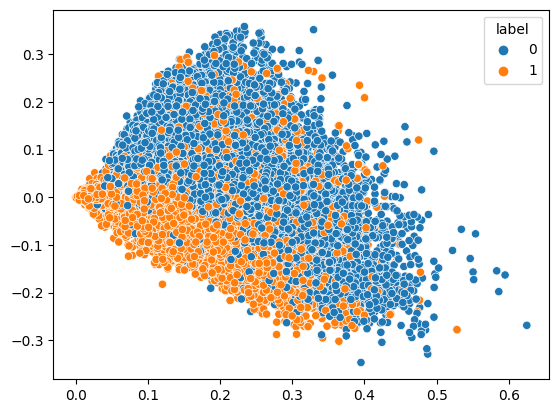

In [ ]:
sns.scatterplot(x = Xpca[:,0],y = Xpca[:,1],hue=y, data=data_cleaned)

In [ ]:
# Separating data for graph
x_val_label0 = []
x_val_label1 = []
for i in range(0,Xpca.shape[0]):
    if y.iloc[i]==0:
        x_val_label0.append((Xpca[i]))
    else:
        x_val_label1.append((Xpca[i]))

Text(0.5, 1.0, 'Labels 0')

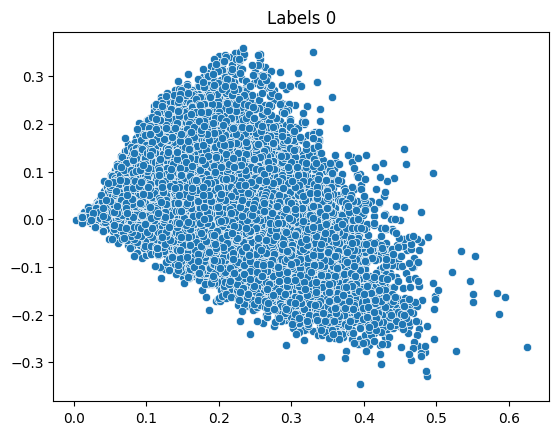

In [ ]:
# Visualizaton of datapoints for the label 0
x_vals=[]
y_vals=[]
for i in range(0,len(x_val_label0)):
    x_vals.append(x_val_label0[i][0])
    y_vals.append(x_val_label0[i][1])
sns.scatterplot(x = x_vals,y = y_vals).set_title('Labels 0')

Text(0.5, 1.0, 'Labels 1')

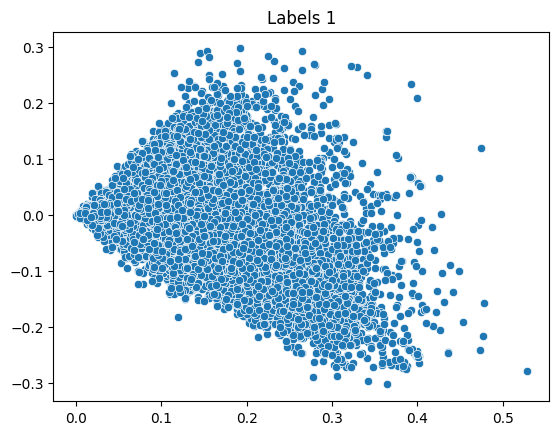

In [ ]:
# Visualizaton of datapoints for the label 1
x_vals=[]
y_vals=[]
for i in range(0,len(x_val_label1)):
    x_vals.append(x_val_label1[i][0])
    y_vals.append(x_val_label1[i][1])
sns.scatterplot(x = x_vals,y = y_vals).set_title('Labels 1')

In [ ]:
# Splitting the dataset using SkLearn function
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=48,test_size=0.2, shuffle=True)

**Naive Bayes** **Model**

Complement Naive Bayes(CNB) is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks.

We wanted to implement this model with Gaussian Naive Bayes and as Gaussian only accept numpy array and doesnt take sparse matrix, we proceeded with Complement to check its accuracy.

In [ ]:
from sklearn.naive_bayes import ComplementNB

We have performed hyperparameter tuning to select the best values to improve accuracy of the model

In [ ]:
# Hyperparameter tuning of model using different alpha values
i_val = []
accuracy = []
vals = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
for i in vals:
    clf = ComplementNB(force_alpha=True,alpha=i)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    i_val.append(i)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:1052: RuntimeWarning: divide by zero encountered in log
  logged = np.log(comp_count / comp_count.sum(axis=1, keepdims=True))


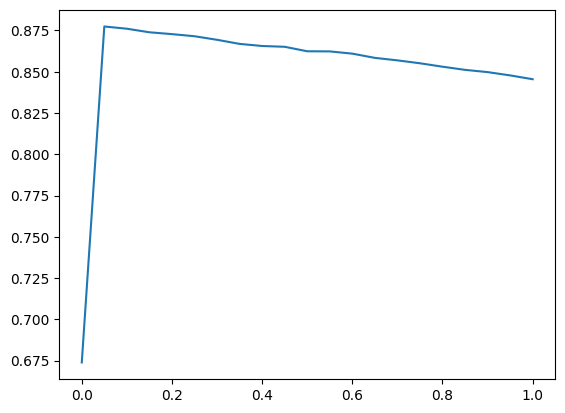

In [ ]:
# Graph for Accuracy
plt.plot(i_val,accuracy)

From this graph it is evident that the accuracy of the model decreases upon increasing alpha values. So it is good to take lower values as alpha.

In [ ]:
i_val = []
accuracy = []
vals = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]
for i in vals:
    clf = ComplementNB(force_alpha=True,alpha=i)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    i_val.append(i)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:1052: RuntimeWarning: divide by zero encountered in log
  logged = np.log(comp_count / comp_count.sum(axis=1, keepdims=True))


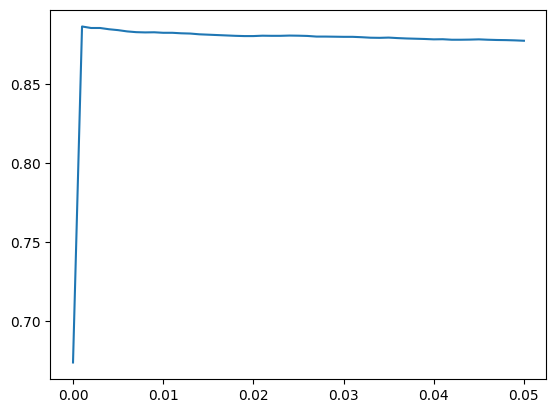

In [ ]:
plt.plot(i_val,accuracy)

From this graph for the alpha range of 0 to 0.05, we achieve maximum accuracy when alpha value is 0.001. So we consider this value and check the metrics of the model for the dataset.

In [ ]:
# Implementing the model
clf = ComplementNB(force_alpha=True,alpha=0.001,norm=True)
y_pred_NB = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
accuracy_NB = accuracy_score(y_test,y_pred)
accuracy_NB

0.8774368807925855

In [ ]:
precision_NB = precision_score(y_test,y_pred)
precision_NB

0.8558669001751313

In [ ]:
recall_NB = recall_score(y_test,y_pred)
recall_NB

0.8729903536977492

In [ ]:
f1_NB = f1_score(y_test,y_pred)
f1_NB

0.8643438273788469

In [ ]:
conf_NB = confusion_matrix(y_test,y_pred)
conf_NB

array([[6095,  823],
       [ 711, 4887]])

[Text(0.5, 1.0, 'Confusion matrix for Naive Bayes model')]

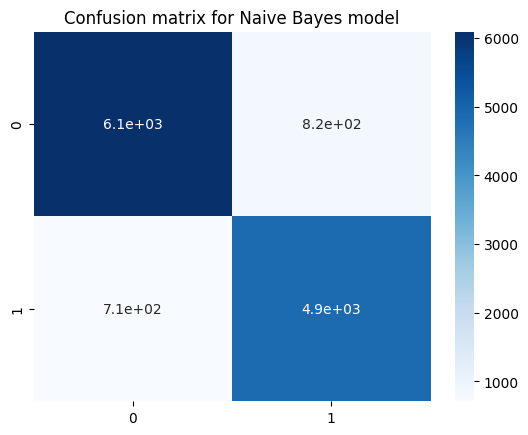

In [ ]:
sns.heatmap(conf_NB, annot=True,cmap='Blues').set(title='Confusion matrix for Naive Bayes model')

Naive Bayes is tuned based on the parameters which produces an accuracy of 87%.

**SGD Classifier**

Stochastic Gradient Descent has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:

Efficiency.

Ease of implementation (lots of opportunities for code tuning).

In [ ]:
from sklearn.linear_model import SGDClassifier

Here we again perform hyperparameter tuning to choose the best loss methods and alpha values and the graphs are generated.

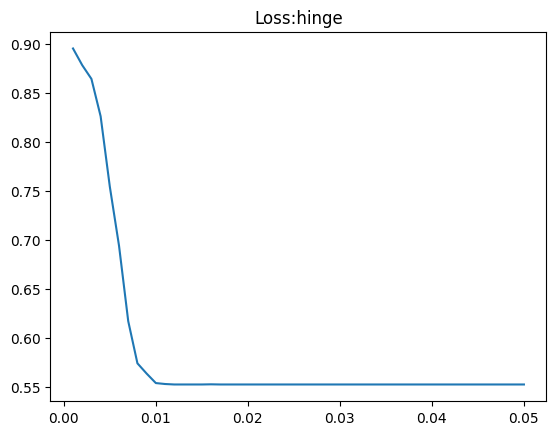

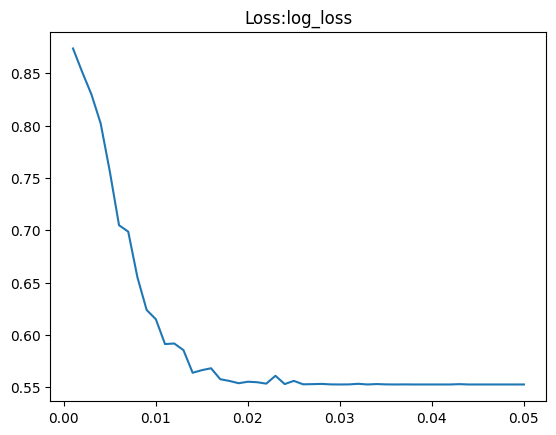

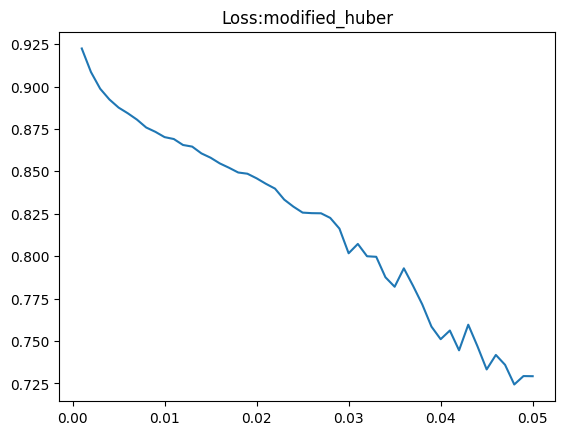

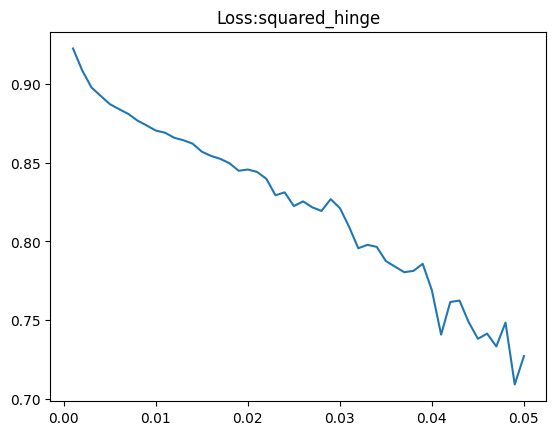

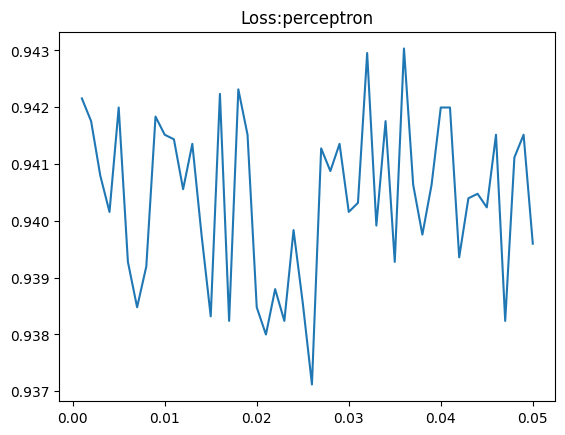

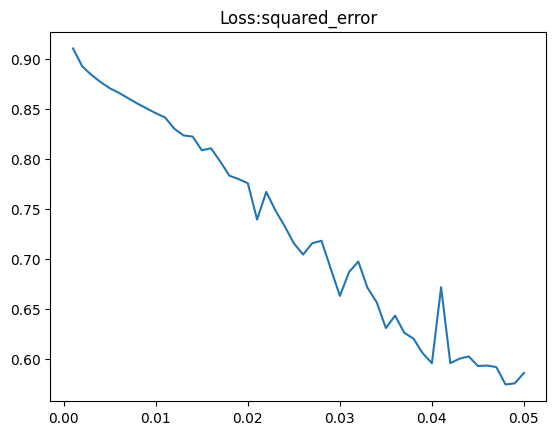

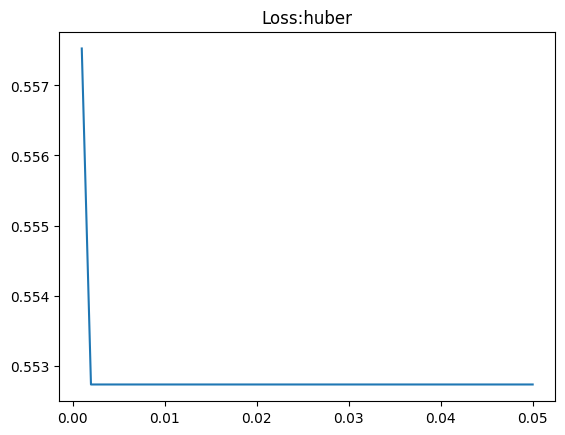

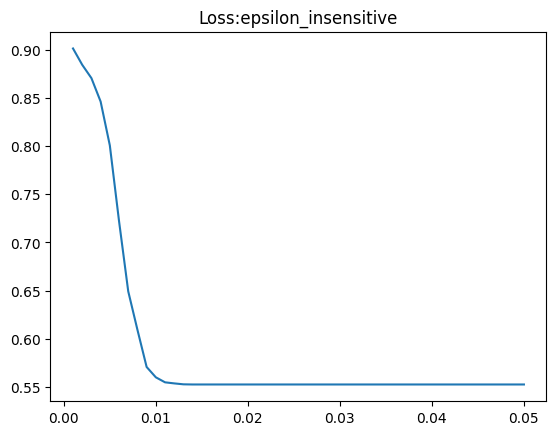

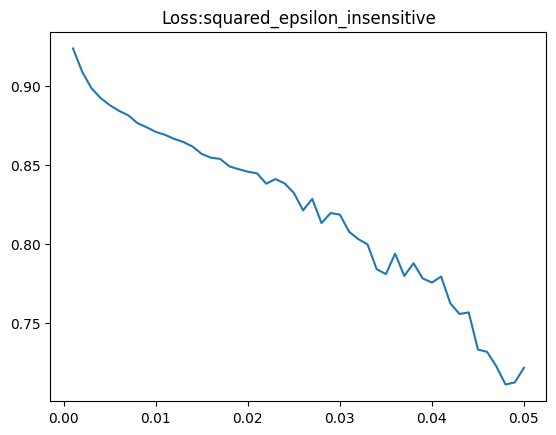

In [ ]:
# Hyperparameter tuning based on the losses and alpha values
vals = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]
losses = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
for i in losses:
    i_val = []
    accuracy = []
    for j in vals:
        clf = SGDClassifier(loss=i, alpha=j, max_iter=200)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,y_pred))
        i_val.append(j)
    plt.plot(i_val,accuracy)
    plt.title(f'Loss:{i}')
    plt.show()

Based on the hyperparameter tuning graph, we can understand with modified huber loss and with an alpha value of 0.0001, we were able to achieve good accuracy. So the model is implemented with a penalty of l2 regularization with these values.

In [ ]:
clf = SGDClassifier(loss='modified_huber', alpha=0.0001, max_iter=200,penalty='l2')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
accuracy_SGDC = accuracy_score(y_test,y_pred)
accuracy_SGDC

0.9491850431447747

In [ ]:
precision_SGDC = precision_score(y_test,y_pred)
precision_SGDC

0.9397376816731655

In [ ]:
recall_SGDC = recall_score(y_test,y_pred)
recall_SGDC

0.9471239728474455

In [ ]:
f1_SGDC = f1_score(y_test,y_pred)
f1_SGDC

0.9434163701067615

In [ ]:
conf_SGDC = confusion_matrix(y_test,y_pred)
conf_SGDC

array([[6578,  340],
       [ 296, 5302]])

[Text(0.5, 1.0, 'Confusion matrix for SGDC model')]

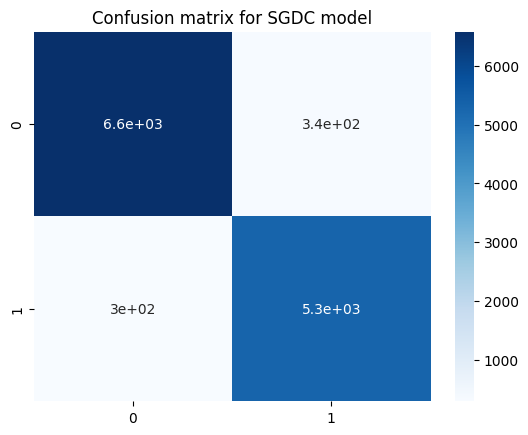

In [ ]:
sns.heatmap(conf_SGDC, annot=True,cmap='Blues').set(title='Confusion matrix for SGDC model')

**SVM Classifier**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [ ]:
from sklearn.svm import SVC

We wanted to perform hyperparameter tuning for all the kernels.But we tested with linear kernel to find the best regularization parameter.

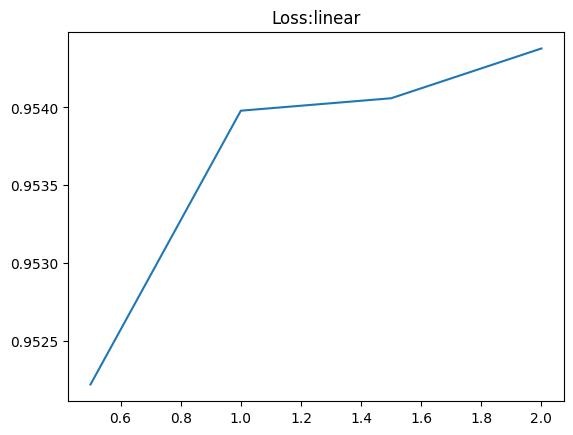

In [ ]:
# Hyperparameter tuning executed for one linear kernel with the 4 alpha values
vals = [0.5,1,1.5,2]
kernels = ['linear']
for i in kernels:
    i_val = []
    accuracy = []
    for j in vals:
        clf = SVC(C=j,kernel=i,gamma='auto')
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,y_pred))
        i_val.append(j)
    plt.plot(i_val,accuracy)
    plt.title(f'Loss:{i}')
    plt.show()

From this graph, we select the regularization value of 2, where we may find smaller margin and good accuracy with linear kernel.

In [ ]:
clf = SVC(C=2,kernel='linear',gamma='auto',verbose=True)
y_pred_SVC = clf.fit(X_train, y_train).predict(X_test)

[LibSVM]

In [ ]:
accuracy_SVC = accuracy_score(y_test,y_pred_SVC)
accuracy_SVC

0.9543783956535634

In [ ]:
precision_SVC = precision_score(y_test,y_pred_SVC)
precision_SVC

0.9523123987763181

In [ ]:
recall_SVC = recall_score(y_test,y_pred_SVC)
recall_SVC

0.9453376205787781

In [ ]:
f1_SVC = f1_score(y_test,y_pred_SVC)
f1_SVC

0.9488121918422232

In [ ]:
conf_SVC = confusion_matrix(y_test,y_pred_SVC)
conf_SVC

array([[6653,  265],
       [ 306, 5292]])

[Text(0.5, 1.0, 'Confusion matrix for SVM model')]

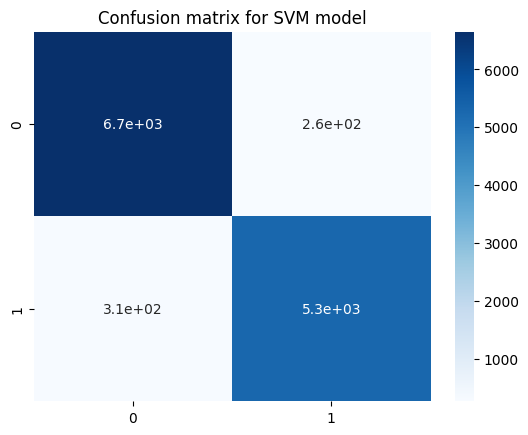

In [ ]:
sns.heatmap(conf_SVC, annot=True,cmap='Blues').set(title='Confusion matrix for SVM model')

SVM produces a good accuracy of about 95.4% with the chosen parameters.

**Random Forest**

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

We performed hyperparameter tuning for selecting the best criterion and its features

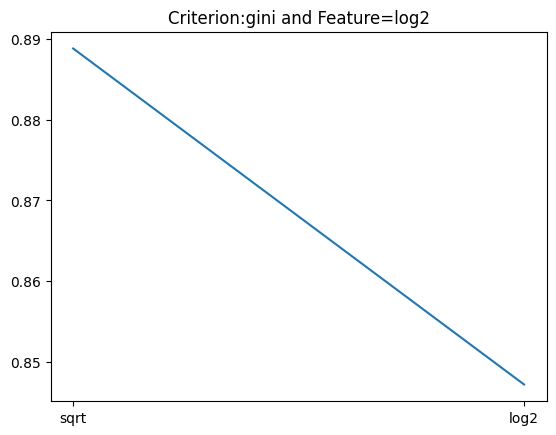

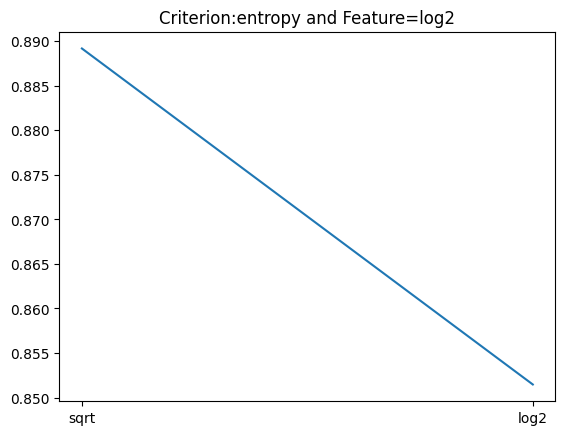

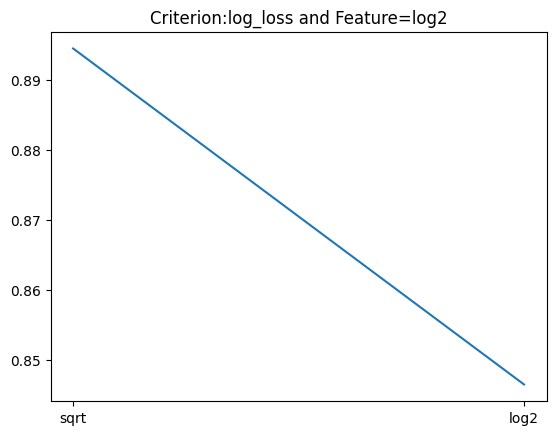

In [ ]:
# Hyperparameter tuning for Random Forest Classifier with different criterions and metrics
criterion=['gini','entropy','log_loss']
features=['sqrt','log2']
for i in criterion:
    i_val = []
    accuracy = []
    for j in features:
        clf = RandomForestClassifier(n_estimators=20,criterion=i,max_features=j)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,y_pred))
        i_val.append(j)
    plt.plot(i_val,accuracy)
    plt.title(f'Criterion:{i} and Feature={j}')
    plt.show()

When run with different criterion and metrics, we were able to achieve good accuracy with log_loss criteria and sqrt and the model is implemented with it.

In [ ]:
 clf = RandomForestClassifier(n_estimators=40,criterion='log_loss',max_features='sqrt')
y_pred_RF = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
accuracy_RF = accuracy_score(y_test,y_pred_RF)
accuracy_RF

0.9068392457654203

In [ ]:
precision_RF = precision_score(y_test,y_pred_RF)
precision_RF

0.9219345011424219

In [ ]:
recall_RF = recall_score(y_test,y_pred_RF)
recall_RF

0.864951768488746

In [ ]:
f1_RF = f1_score(y_test,y_pred_RF)
f1_RF

0.8925345622119815

In [ ]:
conf_RF = confusion_matrix(y_test,y_pred_RF)
conf_RF

array([[6508,  410],
       [ 756, 4842]])

[Text(0.5, 1.0, 'Confusion matrix for Random Forest Model')]

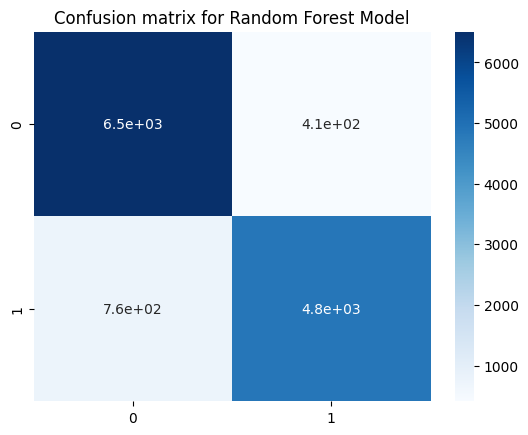

In [ ]:
sns.heatmap(conf_RF, annot=True,cmap='Blues').set(title='Confusion matrix for Random Forest Model')

With Random Forest we acheived an accuracy of 90.6% on this dataset.

#### Data Cleaning For CNN & LSTM

In [3]:
#df = pd.read_csv('WELFake_Dataset.csv')

In [4]:
#df = df.drop_duplicates(inplace=True)

In [5]:
#df = df.drop(columns=['Unnamed: 0'], axis = 1)

In [6]:
#df = df.dropna().reset_index(drop=True)


In [7]:
# Merging Title and Text together
df['Full_data'] = df['title'] + ' ' + df['text']

In [9]:
df

,title,text,label,Full_data
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...
...,...,...,...,...
71530,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...
71532,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
71533,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...
71534,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63121 entries, 0 to 71535
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      63121 non-null  object
 1   text       63121 non-null  object
 2   label      63121 non-null  int64 
 3   Full_data  63121 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [10]:
df['Full_data'] = df['Full_data'].str.lower()

In [11]:
#import re
def clean_data(Full_data):
    if isinstance(Full_data, str):
        Full_data = re.sub(r'<.*?>', '', Full_data)
        Full_data = re.sub(r'[^a-zA-Z0-9\s]', '', Full_data)
        Full_data = re.sub(r'https?://\S+|www\.\S+', '', Full_data)
        return Full_data
    else:
        return ''

In [12]:

df['cleaned_text'] = df['Full_data'].apply(clean_data)

In [13]:

df.dropna(axis=1, how='all', inplace=True)


In [14]:
#import nltk
#nltk.download('stopwords')

#stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Gayathri
[nltk_data]     sruthi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# Removing Stopwords
def remove_stopwords(Full_data):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Gayathri
[nltk_data]     sruthi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# Lemmatizing the text
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Full_data'] = df['Full_data'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [17]:
# saving the dataset
df.to_csv('Cleaned_dataset.csv', index=False)

### CNN

In [18]:
#import tensorflow as tf
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

text = df['cleaned_text']
labels = df['label']

unique_labels = list(set(labels))
num_to_label = {i: label for i, label in enumerate(unique_labels)}
label_to_num = {label: i for i, label in enumerate(unique_labels)}
labels = [label_to_num[label] for label in labels]

train_text, val_text, train_labels, val_labels = train_test_split(text, labels, test_size=0.2)

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_text)

train_sequences = tokenizer.texts_to_sequences(train_text)
val_sequences = tokenizer.texts_to_sequences(val_text)

train_padded = pad_sequences(train_sequences, maxlen=500, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=500, padding='post')

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(unique_labels))
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=len(unique_labels))

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=500),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(unique_labels), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_padded, train_labels, validation_data=(val_padded, val_labels), epochs=10)




Epoch 1/10


1578/1578 [==============================] - 216s 136ms/step - loss: 0.1277 - accuracy: 0.9463 - val_loss: 0.1288 - val_accuracy: 0.9503
Epoch 2/10
1578/1578 [==============================] - 190s 120ms/step - loss: 0.0434 - accuracy: 0.9844 - val_loss: 0.0830 - val_accuracy: 0.9719
Epoch 3/10
1578/1578 [==============================] - 235s 149ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0921 - val_accuracy: 0.9731
Epoch 4/10
1578/1578 [==============================] - 210s 133ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0996 - val_accuracy: 0.9716
Epoch 5/10
1578/1578 [==============================] - 237s 150ms/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.1156 - val_accuracy: 0.9692
Epoch 6/10
1578/1578 [==============================] - 164s 104ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.1248 - val_accuracy: 0.9701
Epoch 7/10
1578/1578 [==============================] - 166s 105ms/step - loss: 0.0066 - accuracy: 0.9979 -

In [23]:
# CNN Accuracy
def categorical_accuracy(preds, labels):
    return np.mean(np.equal(np.argmax(preds, 1), np.argmax(labels, 1)))

test_text = df['cleaned_text']
test_labels = df['label']

test_labels = [label_to_num[label] for label in test_labels]
test_sequences = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequences, maxlen=500, padding='post')

test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=len(unique_labels))
preds = model.predict(test_padded)

print("Test accuracy:", categorical_accuracy(preds, test_labels))

1973/1973 [==============================] - 72s 36ms/step
Test accuracy: 0.9926807243231254


We have tokenized the text using a Tokenizer with a vocabulary size of 5000 words. Sequences are then padded to a maximum length of 500 for both training and validation sets. A sequential model is defined with an embedding layer, a 1D convolutional layer with 'relu' activation function, global max pooling, and dense layers with 'softmax' activation function and model is compiled with categorical crossentropy loss and the Adam optimizer.
The model is trained on the training data for 10 epochs, and the training progress is stored in the 'history' variable.

We have utilized 1D convolutions with 'relu' activation function which can effectively capture local patterns and features in sequential data, such as sentences or news articles, which are suitable for identifying key linguistic cues and patterns that can help distinguish between real and fake news.
CNN have the ability to automatically learn relevant features from the input data. This eliminates the need for manual feature engineering, which can be time-consuming and error-prone. CNNs can learn to extract important features and representations directly from the raw text, allowing for more robust and accurate fake news classification.

overall it achieved an accuracy of 99.2%

### LSTM

In [10]:
#from keras.preprocessing.text import Tokenizer
#from keras.utils import pad_sequences
# from keras_preprocessing.sequence import pad_sequences
#from keras.utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense


data = df['news']
labels = df['label']

max_sequence_length = 100
max_num_words = 20000

tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

labels = np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

embedding_dim = 100
lstm_out = 196

model = Sequential()
model.add(Embedding(max_num_words, embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 5

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy*100}')

Epoch 1/5
1421/1421 [==============================] - 1049s 734ms/step - loss: 0.2429 - accuracy: 0.9021 - val_loss: 0.1806 - val_accuracy: 0.9279
Epoch 2/5
1421/1421 [==============================] - 1021s 719ms/step - loss: 0.1320 - accuracy: 0.9522 - val_loss: 0.1576 - val_accuracy: 0.9436
Epoch 3/5
1421/1421 [==============================] - 1012s 712ms/step - loss: 0.0887 - accuracy: 0.9684 - val_loss: 0.1746 - val_accuracy: 0.9412
Epoch 4/5
1421/1421 [==============================] - 1008s 709ms/step - loss: 0.0595 - accuracy: 0.9796 - val_loss: 0.2038 - val_accuracy: 0.9400
Epoch 5/5
395/395 [==============================] - 40s 99ms/step
Test accuracy: 92.97425742574258


In [16]:
precision = precision_score(y_test,y_pred,average='weighted')
precision

0.9301198374676177

In [18]:
recall = recall_score(y_test,y_pred,average='weighted')
recall

0.9297425742574258

In [20]:
f1score = f1_score(y_test,y_pred,average='weighted')
f1score

0.9295748821711162

We have used LSTM model for fake news classification due to its ability to handle sequential data, model variable-length text, capture contextual information where it can understand the nuanced meaning and detect misleading or false statements. By leveraging these strengths, LSTM models can effectively analyze and classify fake news articles, contributing to the fight against misinformation.
In fake news classification, the length of news articles can vary significantly. LSTM can handle variable-length inputs through the use of padding and pooling operations. Padding ensures that all inputs have the same length, while pooling reduces the dimensionality of the extracted features.

Overall it achieved an accuracy of 92.97%

### References

https://huggingface.co/hamzab/roberta-fake-news-classification?text=Some+ninja+attacked+the+White+House.
https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/model#transformers.PreTrainedModel
https://medium.com/@yingbiao/text-classification-with-xlnet-in-action-869029246f7e  
https://www.kaggle.com/code/harshpraharaj98/text-classification-using-bert-and-xlnet
https://colab.research.google.com/drive/16gx06PVffJwS4pRhysCmc5qbPm26vsY8#scrollTo=oCYZa1lQ8Jn8     
https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles
https://www.kaggle.com/code/tmishinev/fake-news-lstm-baseline-97-accuracy